In [117]:
import numpy as np 

import pandas as pd 
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [118]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
data = [train_df,test_df]

In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [120]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = round((train_df.isnull().sum()/train_df.isnull().count()*100),1).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

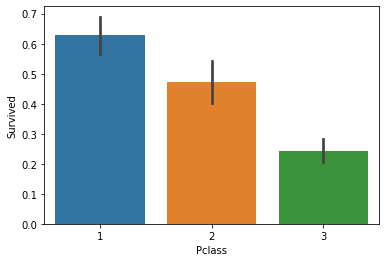

In [122]:
sns.barplot(x='Pclass', y='Survived', data=train_df)


C:\Users\Hasan\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


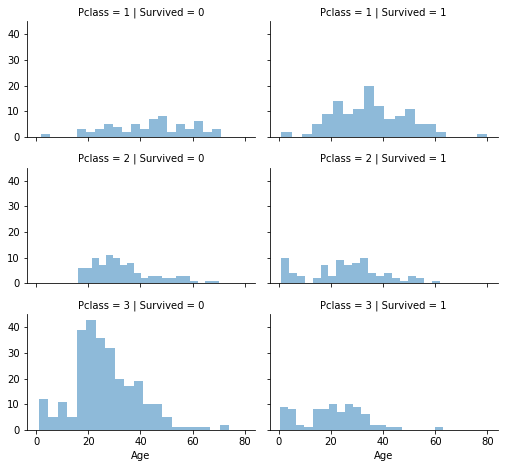

In [123]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Data Preprocessing


## Finding outliers of Train_df

In [124]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_num = train_df.select_dtypes(include = ["float64","int64"])
train_num = train_num.dropna()
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(train_num)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1

In [125]:
train_num_scores = clf.negative_outlier_factor_
np.sort(train_num_scores)[0:20]

array([-4.98317158, -4.66477778, -3.65909632, -3.65895813, -3.65895813,
       -2.90977516, -2.43790059, -2.31967014, -2.14700015, -2.10778272,
       -2.00243852, -1.77321267, -1.7565201 , -1.75394885, -1.74048416,
       -1.72304058, -1.64890097, -1.58916605, -1.57252712, -1.56975726])

In [126]:
esik_deger = np.sort(train_num_scores)[11]
train_num[train_num_scores < esik_deger]

,Survived,Pclass,Age,SibSp,Parch,Fare
68,1,3,17.0,4,2,7.9250
179,0,3,36.0,0,0,0.0000
258,1,1,35.0,0,0,512.3292
263,0,1,40.0,0,0,0.0000
271,1,3,25.0,0,0,0.0000
302,0,3,19.0,0,0,0.0000
378,0,3,20.0,0,0,4.0125
679,1,1,36.0,0,1,512.3292
737,1,1,35.0,0,0,512.3292
806,0,1,39.0,0,0,0.0000


In [127]:
inx = train_num[train_num_scores < esik_deger].index
train_df = train_df.drop(inx)
train_df = train_df.reset_index()
train_df

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
875,886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
876,887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
877,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
878,889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Finding outliers of Test_df

In [128]:
test_df = test_df.drop(['PassengerId'], axis=1)
test_num = test_df.select_dtypes(include = ["float64","int64"])
test_num = test_num.dropna()
clff = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clff.fit_predict(test_num)

array([ 1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1,  1

In [129]:
test_num_scores = clff.negative_outlier_factor_
np.sort(test_num_scores)[0:20]

array([-3.49897129, -3.13885199, -1.87419022, -1.80213694, -1.62741775,
       -1.60422453, -1.60247577, -1.58566598, -1.50740159, -1.5055974 ,
       -1.49464062, -1.47223998, -1.46675078, -1.46485159, -1.44783582,
       -1.41908224, -1.4097682 , -1.40725188, -1.39459611, -1.36573641])

In [130]:
esik_deger = np.sort(test_num_scores)[2]
test_num[test_num_scores < esik_deger]

,Pclass,Age,SibSp,Parch,Fare
21,3,9.0,0,1,3.1708
343,1,58.0,0,1,512.3292


In [131]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [132]:
inx = test_num[test_num_scores < esik_deger].index
test_df = test_df.drop(inx)
test_df = test_df.reset_index()
test_df

,index,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
411,413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
412,414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
413,415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
414,416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Missing Data:


In [133]:
import missingno as msno

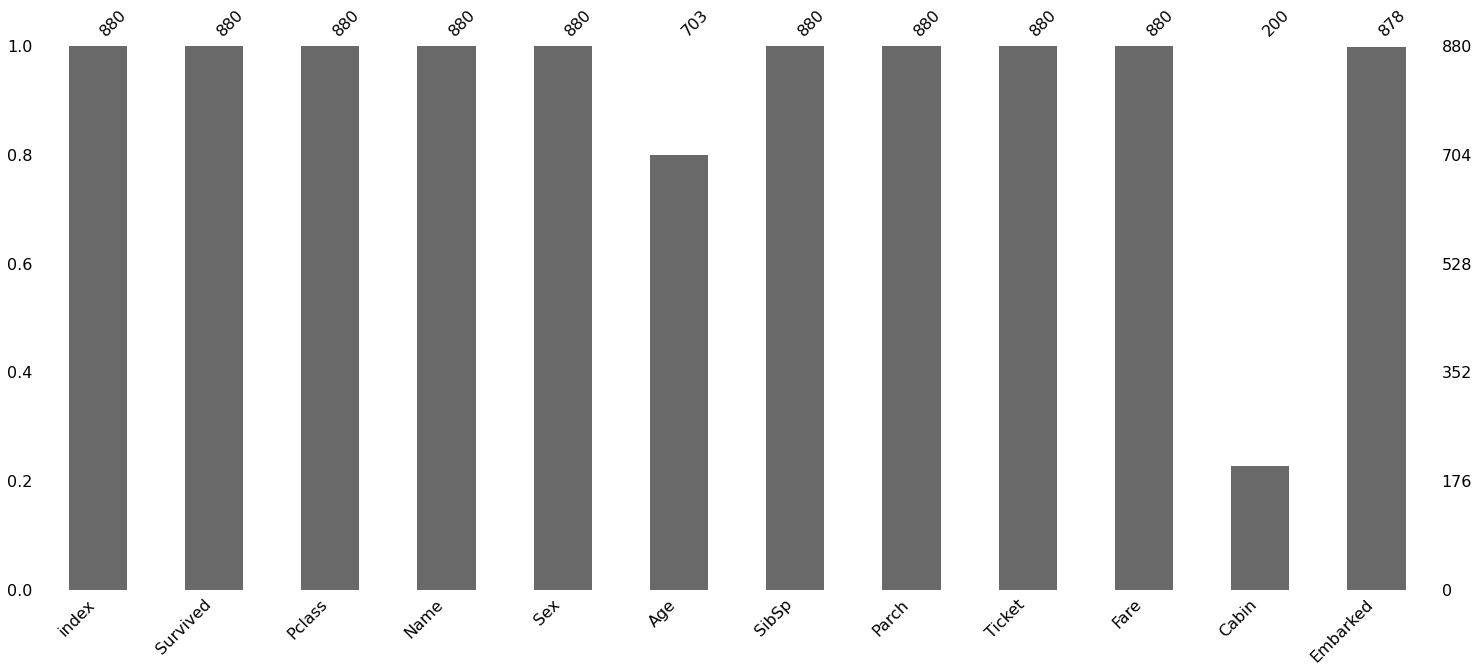

In [134]:
msno.bar(train_df);

In [135]:
for dataset in data:
    dataset.drop('Name', axis=1, inplace=True)

## Age(Train_df)


In [136]:
df = train_df.select_dtypes(include = ['float64', 'int64'])


In [137]:
from ycimpute.imputer import knnimput
var_names = list(df)
n_df = np.array(df)
dff = knnimput.KNN(k = 4).complete(n_df)
dff = pd.DataFrame(dff, columns = var_names)

Imputing row 1/880 with 0 missing, elapsed time: 0.184
Imputing row 101/880 with 1 missing, elapsed time: 0.187
Imputing row 201/880 with 0 missing, elapsed time: 0.188
Imputing row 301/880 with 1 missing, elapsed time: 0.190
Imputing row 401/880 with 0 missing, elapsed time: 0.191
Imputing row 501/880 with 1 missing, elapsed time: 0.193
Imputing row 601/880 with 0 missing, elapsed time: 0.194
Imputing row 701/880 with 0 missing, elapsed time: 0.196
Imputing row 801/880 with 0 missing, elapsed time: 0.197


In [138]:
train_df["Age"] = dff["Age"]

In [139]:
train_df.isnull().sum()

index         0
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       680
Embarked      2
dtype: int64

## Age (Test_df)

In [140]:
dft = test_df.select_dtypes(include = ['float64', 'int64'])

In [141]:
var_namest = list(dft)
n_dft = np.array(dft)
dfft = knnimput.KNN(k = 4).complete(n_dft)
dfft = pd.DataFrame(dfft, columns = var_namest)
test_df["Age"] = dfft["Age"]

Imputing row 1/416 with 0 missing, elapsed time: 0.055
Imputing row 101/416 with 0 missing, elapsed time: 0.056
Imputing row 201/416 with 0 missing, elapsed time: 0.057
Imputing row 301/416 with 1 missing, elapsed time: 0.060
Imputing row 401/416 with 0 missing, elapsed time: 0.061


In [142]:
test_df.isnull().sum()

index         0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       326
Embarked      0
dtype: int64

## Embarked:



In [143]:
train_df['Embarked'].describe()

count     878
unique      3
top         S
freq      637
Name: Embarked, dtype: object

In [144]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Cabin


In [145]:
for dataset in data:
    dataset.drop('Cabin', axis=1, inplace=True)

## Converting Features:


In [146]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     880 non-null    int64  
 1   Survived  880 non-null    int64  
 2   Pclass    880 non-null    int64  
 3   Name      880 non-null    object 
 4   Sex       880 non-null    object 
 5   Age       880 non-null    float64
 6   SibSp     880 non-null    int64  
 7   Parch     880 non-null    int64  
 8   Ticket    880 non-null    object 
 9   Fare      880 non-null    float64
 10  Embarked  880 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 75.8+ KB


## Fare:


In [147]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

## Sex:


In [148]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

## Ticket



In [149]:
train_df['Ticket'].describe()


count        880
unique       675
top       347082
freq           7
Name: Ticket, dtype: object

In [150]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

## Embarked

In [151]:
train_df = pd.get_dummies(train_df, columns = ["Embarked"], prefix = ["Embarked"],drop_first=True)

In [152]:
test_df = pd.get_dummies(test_df, columns = ["Embarked"], prefix = ["Embarked"],drop_first=True)

In [153]:
train_df

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7,0,1
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71,0,0
2,2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7,0,1
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53,0,1
4,4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8,0,1
...,...,...,...,...,...,...,...,...,...,...,...
875,886,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13,0,1
876,887,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30,0,1
877,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,23.205032,1,2,23,0,1
878,889,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30,0,0


## Creating Categories:

### Age:


In [154]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

train_df['Age'].value_counts()

6    173
4    164
3    147
5    123
2    114
0     83
1     76
Name: Age, dtype: int64

## Building Machine Learning Models


In [155]:
X_train = train_df.drop(["Survived","Name"], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("Name", axis=1).copy()

In [156]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       880 non-null    int64 
 1   Survived    880 non-null    int64 
 2   Pclass      880 non-null    int64 
 3   Name        880 non-null    object
 4   Sex         880 non-null    int64 
 5   Age         880 non-null    int32 
 6   SibSp       880 non-null    int64 
 7   Parch       880 non-null    int64 
 8   Fare        880 non-null    int32 
 9   Embarked_Q  880 non-null    uint8 
 10  Embarked_S  880 non-null    uint8 
dtypes: int32(2), int64(6), object(1), uint8(2)
memory usage: 56.8+ KB


## Stochastic Gradient Descent (SGD):



In [157]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

## Random Forest:


In [158]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Logistic Regression:



In [159]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## K Nearest Neighbor:



In [160]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test) 
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

## Gaussian Naive Bayes:



In [161]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

## Perceptron:


In [66]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Linear Support Vector Machine:



In [67]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Decision Tree



In [68]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test) 
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

## Which is the best Model ?

In [69]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
80.23,Logistic Regression
79.20,KNN
77.95,Naive Bayes
74.55,Support Vector Machines
61.70,Stochastic Gradient Decent
39.32,Perceptron


In [70]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.57954545 0.77272727 0.76136364 0.82954545 0.875      0.85227273
 0.82954545 0.79545455 0.76136364 0.80681818]
Mean: 0.7863636363636364
Standard Deviation: 0.07787200772278097


## Feature Importance


In [71]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
index,0.283
Sex,0.251
Age_Class,0.106
Fare,0.080
Pclass,0.076
Age,0.065
SibSp,0.063
Parch,0.033
Embarked_S,0.031


## Hyperparameter Tuning



In [73]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)


C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(estimator=RandomForestClassifier(max_features='auto', n_jobs=-1,
                                              oob_score=True, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000, 1500]})

In [74]:
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

## Test new Parameters:


In [ ]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 2,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

## Further Evaluation
### Confusion Matrix:



In [291]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[477,  66],
       [ 83, 254]], dtype=int64)

## F-Score


In [292]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7732115677321157